## Introduction

### Glass Identification Project

The Glass Identification Project aims to classify various types of glass based on their chemical composition. The dataset used for this project contains information on the chemical properties of glass samples, including refractive index and concentrations of various oxides such as Na, Mg, Al, Si, K, Ca, Ba, and Fe. The goal is to predict the type of glass (ranging from 1 to 7) based on these attributes.

### Dataset

The dataset consists of 214 observations, each representing a different glass sample. The features in the dataset include:

- **Id**: Unique identifier for each sample
- **Refractive Index**: A measure of how much light is bent when entering the glass
- **Na**: Sodium oxide concentration
- **Mg**: Magnesium oxide concentration
- **Al**: Aluminum oxide concentration
- **Si**: Silicon dioxide concentration
- **K**: Potassium oxide concentration
- **Ca**: Calcium oxide concentration
- **Ba**: Barium oxide concentration
- **Fe**: Iron oxide concentration

### Objective

The primary objective of this project is to build and evaluate machine learning models to accurately classify glass samples into one of the six classes. We will explore and apply several classification algorithms, including:

- **RandomForestClassifier**
- **Support Vector Machine (SVM)**
- **GradientBoostingClassifier**

Each model's performance will be assessed using metrics such as accuracy, precision, recall, and F1-score, and the results will be compared to identify the most effective approach for glass classification.

### Approach

1. **Data Preprocessing**: Clean and prepare the dataset for modeling.
2. **Model Training and Evaluation**: Train and evaluate various classification models.
3. **Model Comparison**: Compare the performance of different models to determine the best one for this classification task.

The results and insights from this project will help understand the effectiveness of different machine learning techniques in classifying glass types and contribute to better material identification in practical applications.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score





In [13]:
# Load the dataset with correct delimiter and column names
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv?raw=true"
column_names = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df = pd.read_csv(url, delimiter=',', names=column_names, header=0)

# Display the first few rows of the dataset
print(df.head())

# Check the column names
print(df.columns)


   Id number       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  \
0          2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00   
1          3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00   
2          4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00   
3          5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00   
4          6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26   

   Type of glass  
0              1  
1              1  
2              1  
3              1  
4              1  
Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')


In [14]:
# Basic information about the dataset
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [15]:
# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Verify the column names again
print(df.columns)


Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')


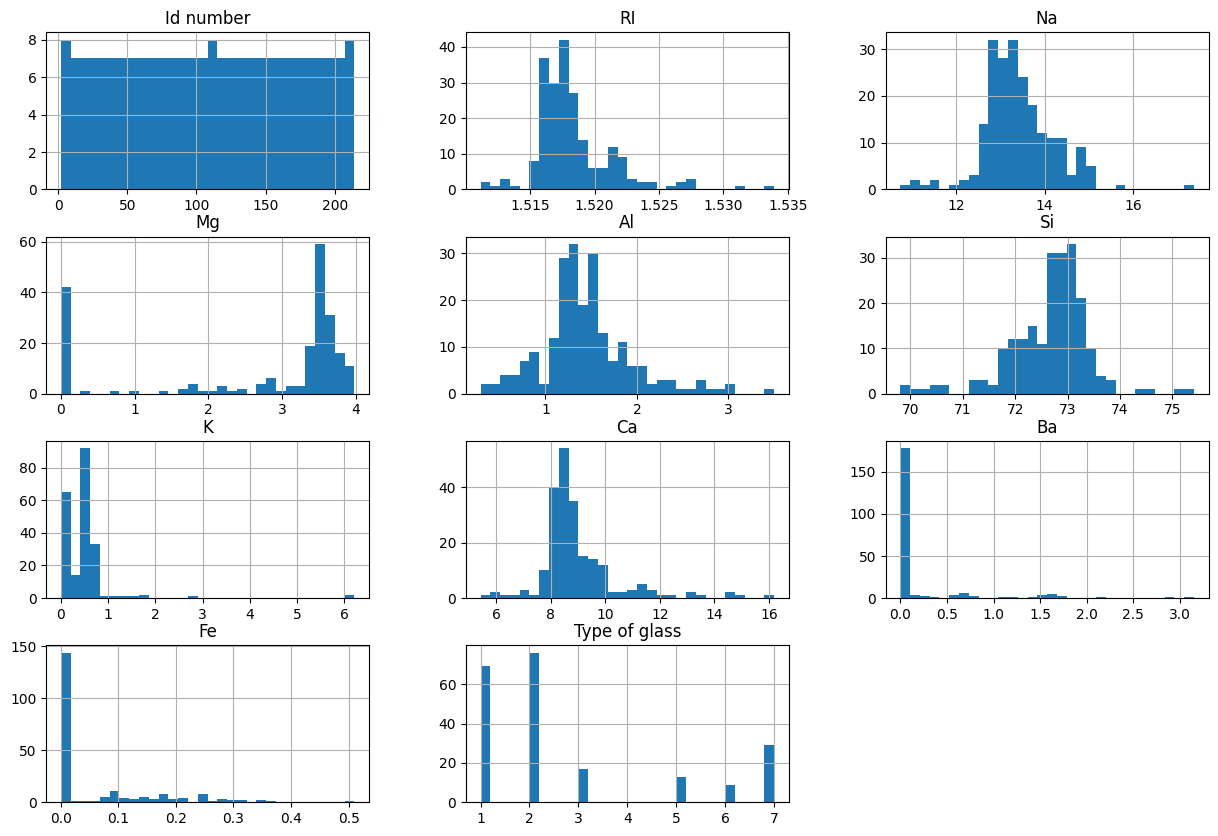

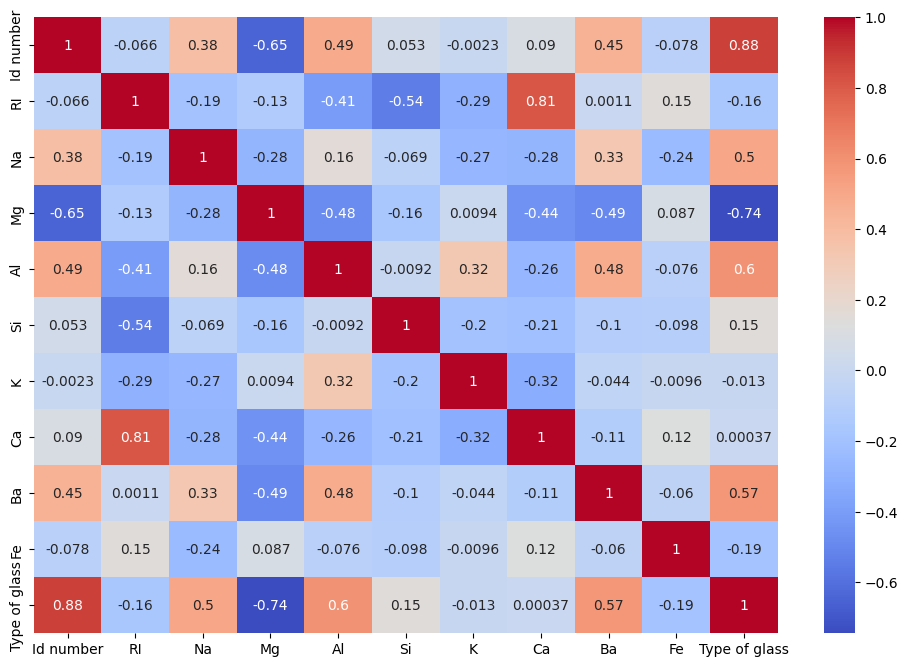

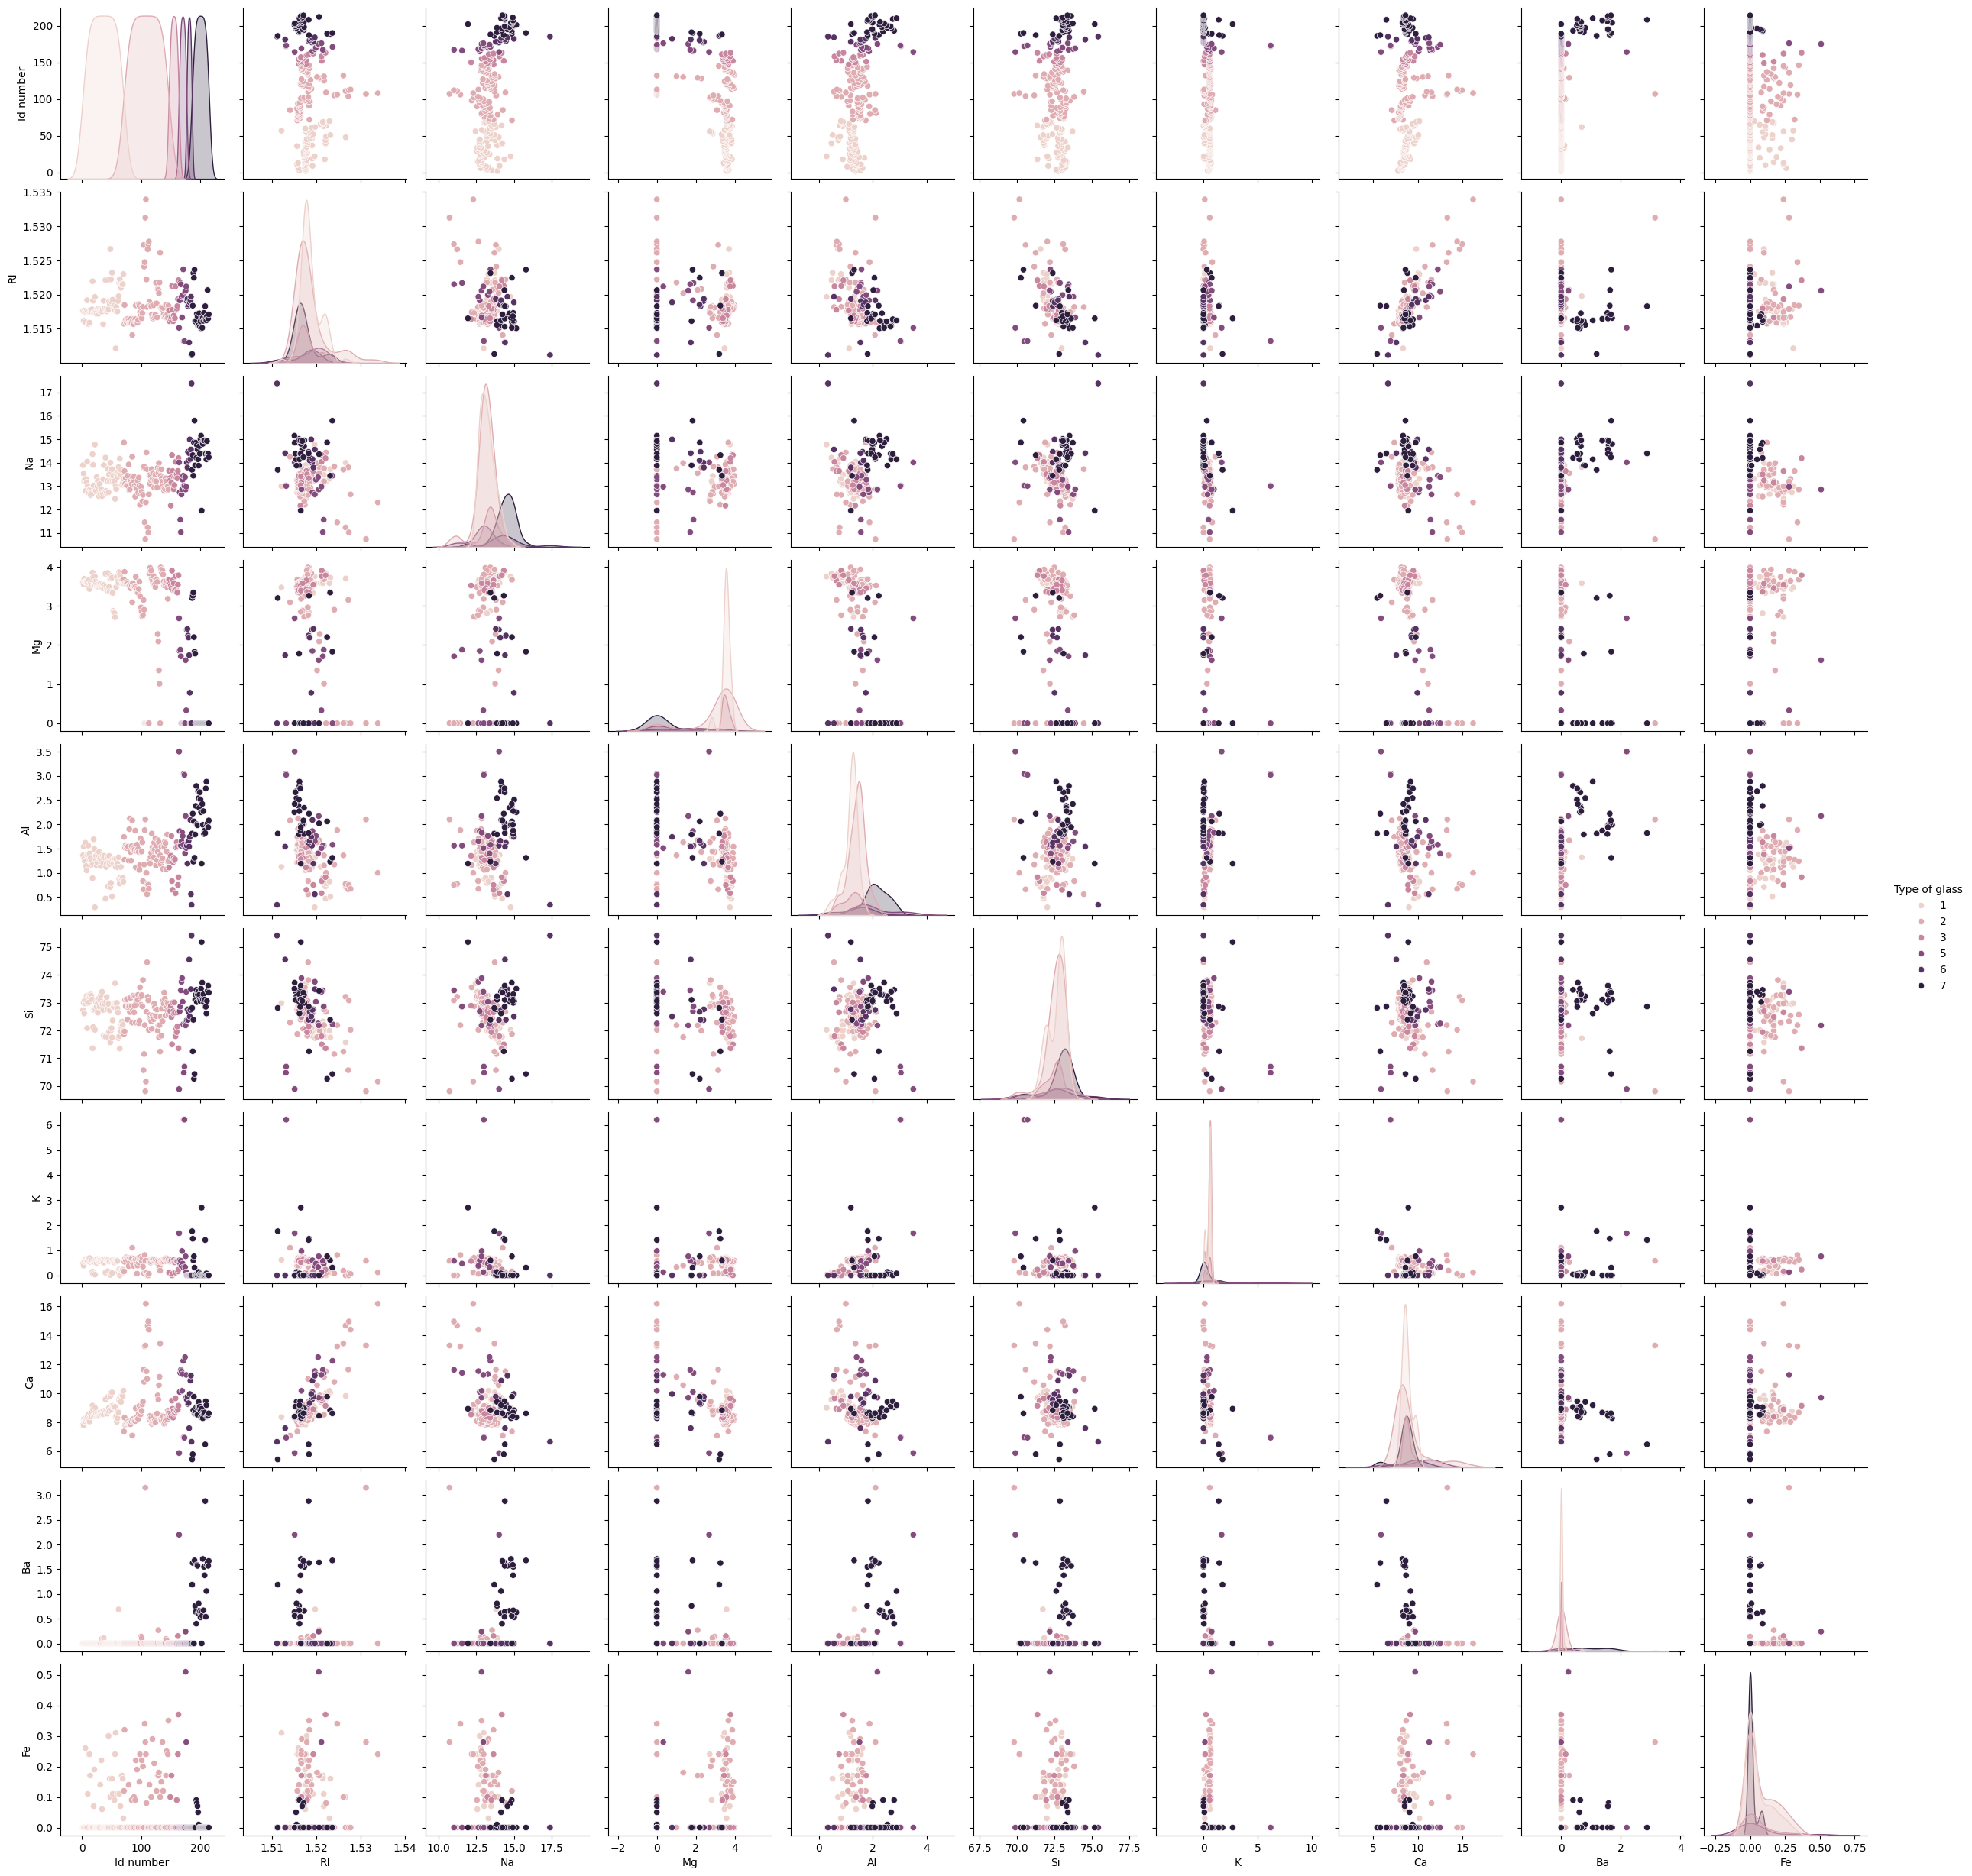

In [16]:
# Plotting the distribution of each feature
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairplot
sns.pairplot(df, hue='Type of glass')
plt.show()


In [17]:
# Split the dataset into features and target variable
X = df.drop(columns=['Id number', 'Type of glass'])
y = df['Type of glass']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Corrected parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt', 'log2'],  # Corrected the options
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with fewer folds for faster execution
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best parameters for RandomForest: {best_params_rf}")
print(f"Best cross-validation score for RandomForest: {best_score_rf}")


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for RandomForest: 0.7647243107769423


In [25]:
# Initialize models with best parameters
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)

# Train the RandomForest model
best_rf.fit(X_train, y_train)

# Make predictions with RandomForest
y_pred_rf = best_rf.predict(X_test)

# Evaluate the RandomForest model
print("RandomForest Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nRandomForest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Comparison with other models

# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svc))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svc))

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print("GradientBoosting Accuracy Score:", accuracy_score(y_test, y_pred_gbc))
print("\nGradientBoosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))
print("\nGradientBoosting Classification Report:\n", classification_report(y_test, y_pred_gbc))


RandomForest Accuracy Score: 0.7209302325581395

RandomForest Confusion Matrix:
 [[ 7  3  0  0  0  0]
 [ 2 12  0  1  0  0]
 [ 1  0  2  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  7]]

RandomForest Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.60      0.80      0.69        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.72        43
   macro avg       0.80      0.66      0.71        43
weighted avg       0.76      0.72      0.72        43

SVM Accuracy Score: 0.6976744186046512

SVM Confusion Matrix:
 [[ 7  3  0  0  0  0]
 [ 2 13  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  7]]

SVM Classification R

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

GradientBoosting Accuracy Score: 0.7209302325581395

GradientBoosting Confusion Matrix:
 [[ 8  1  0  0  0  1]
 [ 3 11  0  1  0  0]
 [ 0  1  2  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  7]]

GradientBoosting Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.80      0.76        10
           2       0.61      0.73      0.67        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       0.88      0.78      0.82         9

    accuracy                           0.72        43
   macro avg       0.79      0.66      0.71        43
weighted avg       0.74      0.72      0.72        43



## Model Performance

After training and evaluating various classification models, we obtained the following results:

### RandomForestClassifier
- **Accuracy Score**: 0.7209

### GradientBoostingClassifier
- **Accuracy Score**: 0.6977

### Support Vector Machine (SVM)
- **Accuracy Score**: 0.6977

## Best Model

Based on the results, the **RandomForestClassifier** achieved the highest accuracy score of **0.7209**, making it the best-performing model for predicting the type of glass in this dataset. It also provides a balanced performance across different classes, particularly excelling in precision and recall for certain classes.

The RandomForestClassifier's robustness and higher accuracy make it the most effective model for this classification task, as compared to the Support Vector Machine (SVM) and Gradient Boosting models.
